In [1]:
# change directory to access radar data
import os
os.chdir('/Users/seanbratton/Documents/UIUC/ATMS523/module_5/machine-learning-1-SeanBratton/homework')  


In [25]:
# import libraries for project
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# import sklearn modules
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV # setup matrix of possibilites
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
######## QUESTION 1 #########

# Split the data into a 70-30 split for training and testing data.

In [3]:
# load radar reflectivity data
reflect_data = pd.read_csv('radar_parameters.csv')

# identify columns in pd.dataframe
reflect_data.columns

Index(['Unnamed: 0', 'Zh (dBZ)', 'Zdr (dB)', 'Ldr (dB)', 'Kdp (deg km-1)',
       'Ah (dBZ/km)', 'Adr (dB/km)', 'R (mm/hr)'],
      dtype='object')

/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


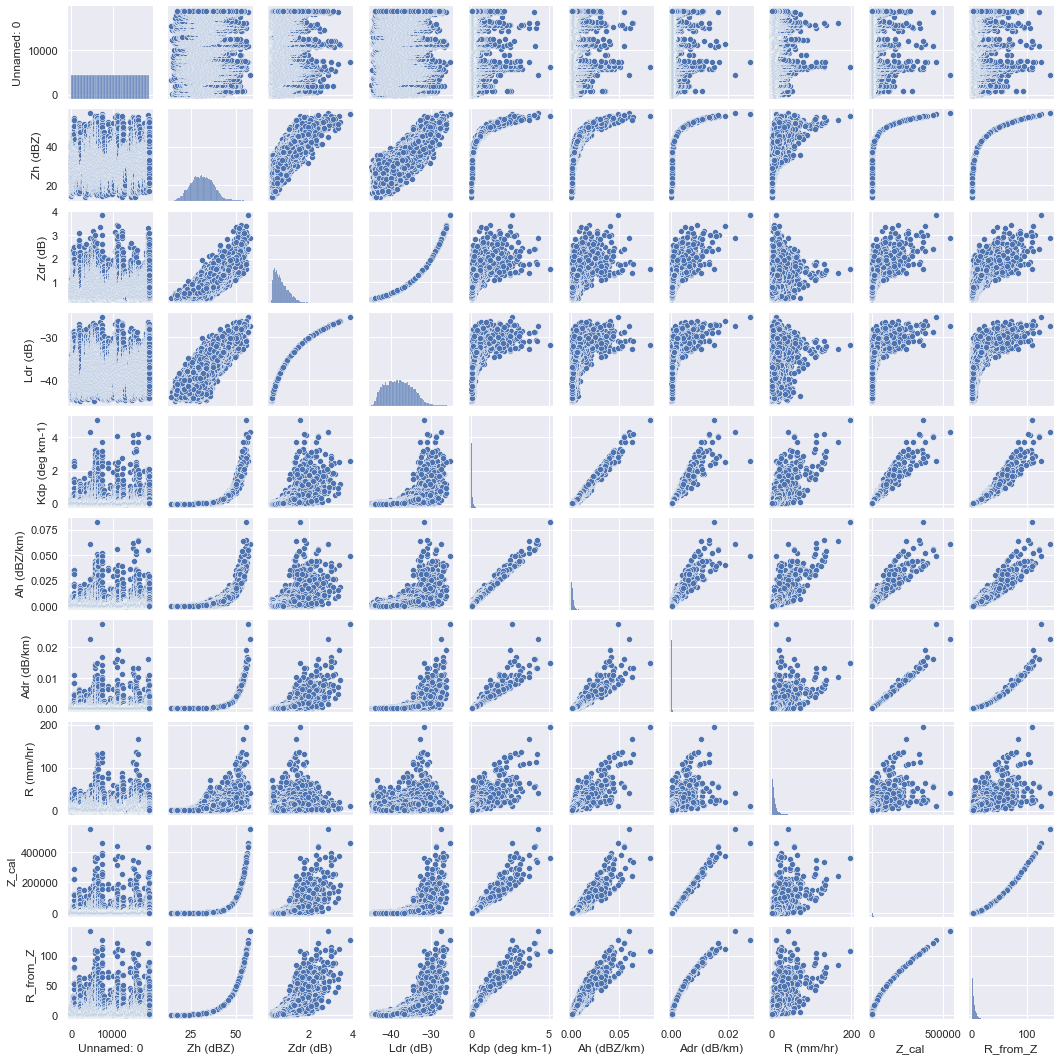

In [35]:
# create pairplot to show relationships between variables

sns.pairplot(reflect_data, size=1.5) 

In [4]:
# X_data is our features dataset

X_data= reflect_data.drop('R (mm/hr)', axis=1) # drop R (mm/hr) to get featuers dataframe

X_data.shape # shape of modified features dataset

(18969, 7)

In [5]:
# y_data is our target dataset

y_data = reflect_data['R (mm/hr)']

y_data.shape # shape of modified target dataset

(18969,)

In [6]:
# train_test_split fucntion is used to create training and testing dataset for feature variables and
# target variable

Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data,
                                                test_size=0.3, train_size=0.7) # 70/30 split used for training and testing


In [7]:
# print shape to determine how data was divided (training/testing)

print(ytrain.shape) # shape of target training dataset
print(ytest.shape) # shape of target testing dataset

(13278,)
(5691,)


In [ ]:
 ########## QUESTION 2 ###########

# Using the split created in (1), train a multiple linear regression dataset using the training dataset, 
# and validate it using the testing dataset. Compare the  and root mean square errors of model on the training 
# and testing sets to a baseline prediction of rain rate using the formula .

In [8]:
# Run model using linear regression model from features training data set and target training data
# choose model class = Linear Regression for this analysis

model = LinearRegression() # instantiate model
model.fit(Xtrain, ytrain)  # fit model to data - needs to be applied to training data
y_model = model.predict(Xtest) # test model to predict target using feature values as part of testing dataset
# .predict is used to predict the target values using the  test features dataset usind defined model. 

In [9]:
# find the r**2 score and MSRE between target test(ytest) and target predicted (y_model)

# predicting the accuracy score
score=r2_score(ytest,y_model) # r2_score funtion used to find coeff of determination between
# the testing target dataset and the modeled values used in the model.predict(Xtest) function above

print('r2 socre is',score) # print score
print('mean_sqrd_error is==',mean_squared_error(ytest,y_model)) # find RMSE between target testing and modeled dataset
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,y_model))) # print score

r2 socre is 0.9834909157923077
mean_sqrd_error is== 1.2724532833898694
root_mean_squared error of is== 1.128030710304409


In [10]:
# Calculations to find the derived rain rate based on DBz data

reflect_data['Z_cal'] = 10**(reflect_data['Zh (dBZ)']/10) # calculate radar reflectivity (Z)
reflect_data['R_from_Z'] = (reflect_data['Z_cal']/200)**(1/1.6) # calculate rain rate (R) using reflectivity values

In [12]:
# new axis is aded to array so it is x,1

Xfit2 = reflect_data['R_from_Z'][:, np.newaxis] # creat new axis to become 2D array
print(Xfit2.shape, y_data.shape) 
# xfit2 is new features dataset 

(18969, 1) (18969,)


/var/folders/7z/zvdlnbkj3073y5v9tyz6f6b80000gn/T/ipykernel_23346/833593464.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xfit2 = reflect_data['R_from_Z'][:, np.newaxis] # creat new axis to become 2D array


In [13]:
#Compare the R**2 and root mean square errors of model on the training and testing sets to a baseline prediction of 
#rain rate using the formula provided.

# new training and testing dataset using new derived quantity as features dataset

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(Xfit2, y_data,
                                                test_size=0.3, train_size=0.7)


model2 = LinearRegression()                       # 2. instantiate model
model2.fit(Xtrain2, ytrain2)                  # 3. fit model to data
y_model2 = model2.predict(Xtest2)

score2=r2_score(ytest2,y_model2)
print('r2 socre is',score2)
print('mean_sqrd_error is==',mean_squared_error(ytest2,y_model2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest2,y_model2)))


r2 socre is 0.46944115135233067
mean_sqrd_error is== 40.62179517929676
root_mean_squared error of is== 6.373522980212495


In [ ]:
# QUESTION 2 SUMMARY:
# When using the 7 features provided, an R^2 value of 0.983 was provided between the features and target 
# data with a RMSE of 1.12. This provides evidence that a majorityf the variance within the rain rate (R) dataset 
# can be explained using this model.
# 
# When comparing this to the baseline value derived from the radar reflectivity value Z, a much lower R^2 value was
# obtained of 0.469. The RMSE was also higher of 6.37 which indicates the model did not as accurately predict the target
# values. 

In [ ]:
########## QUESTION 3 #############

# Repeat 1 doing a grid search over polynomial orders, using a grid search over orders 0-21, and use 
# cross-validation of 7 folds. For the best polynomial model in terms of , does it outperform the baseline 
# and the linear regression model in terms of  and root mean square error?

In [31]:
# Create function for a polynmonial regression
def PolynomialRegression(degree, **kwargs): # degree polynomial
    return make_pipeline(PolynomialFeatures(degree), # a pipeline was consturcted using the PolynomialFeatures and 
    # LinearRegression models
                         LinearRegression(**kwargs))

# PolynomialFeatures: Generate a new feature matrix consisting of all polynomial combinations of the features with degree 
# less than or equal to the specified degree. 

In [32]:
# Create grid using first 7 polynomials

param_grid = {'polynomialfeatures__degree': np.arange(7)} # 7 degree polynomial

grid = GridSearchCV(PolynomialRegression(degree=7), param_grid, cv=7) 

# grid-search = search for the best hyperparameters maximizing the generalization performance 
# of a predictive model.

# cv = cross validation. This is the number of samples the
# dataset is split into for resampling to determine how well model predicts target from features data. 
# The GridSearch function will find models and model peformance output using the define models outlined in the Pipeline
# function above

grid # prints grid output

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=7)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6])})

In [33]:
# Using the above defined grid of polynomials, fit the feature and target datasets to produce a 
# set of values related to model peformance

grid.fit(Xtrain, ytrain)

grid.best_params_ # identifies the number of polynomials that best fits data to produce highest R^2 value

/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 49.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/seanbratton/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_

{'polynomialfeatures__degree': 2}

In [34]:
# cross validation score = estimate the skill of a machine learning model on unseen data

model = grid.best_estimator_ # the model is defined based on the gridsearch performed above that output the best model
score = cross_val_score(model, Xtrain, ytrain, cv=7) # function provides R^2 values when considering all polynomial
# regression models.
print(score)
score_mean = score.mean() # the mean of all scores provided by the cv=7 (7 diffent sets of data)
print(score_mean)

[0.99890261 0.99952572 0.99923459 0.99963441 0.99953907 0.99960892
 0.99925178]
0.9993853001189601


In [ ]:
# QUESTION 3 Summary:

# does it outperform the baseline and the linear regression model in terms of  and root mean square error?

# Yes, this grid-based polynomial regression model has an average cross-valadation score of 0.999 in terms
# of R^2 values. This compares to 0.984 in terms of linear regression, and 0.475 in terms of the baseline.
# this is because multiple polynomial fits were used to determine the best fit to limit variance and bias.

In [ ]:
######## QUESTION 4 ############

# Repeat 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
# Can you beat the baseline, or the linear regression, or best polynomial model with the best 
# optimized Random Forest Regressor in terms of  and root mean square error?

In [23]:
# RTR = that fits a number of classifying decision trees on various sub-samples of the dataset and 
# uses averaging to improve the predictive accuracy and control over-fitting.

# random forest grid is defined using specified hyperparamters 

rf_grid ={'bootstrap': [True, False],  
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
            'max_features': ['auto', 'sqrt'],  
            'min_samples_leaf': [1, 2, 4],  
            'min_samples_split': [2, 5, 10],  
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [26]:
# Create base model using Random Forest Regressor
rf_base = RandomForestRegressor()

In [27]:
# the equivalent of a grid search is peformed using the above defined hyper parameters and random forest model
# cv = 7 meaning 7 differnet allocation datasets will be used as part of this model
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=rf_grid, cv=7)


In [28]:
regress_tree_output = rf_random.fit(Xtrain, ytrain) # the features and training datasets are used and ran as part of this model

regress_tree_output # output printed

RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [29]:
# best model parameters and statitics are defined

rf_random.best_estimator_  
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [30]:
# cross validation score = estimate the skill of a machine learning model on unseen data

# analysis cross-validation of all random grid search model is run to determine mean score
model_rf = rf_random.best_estimator_ 
score_rf = cross_val_score(model_rf, Xtrain, ytrain, cv=7)
print(score_rf)
score_mean_rf = score_rf.mean()
print(score_mean_rf) # mean score of model performance output

[0.97684284 0.98852716 0.9875681  0.95747942 0.9780469  0.98794048
 0.98392197]
0.9800466957403425


In [ ]:
# QUESTION 4 SUMMARY:Can you beat the baseline, or the linear regression, or best polynomial model with the 
# best optimized Random Forest Regressor in terms of R^2 and root mean square error?

# The following are the summary for R^2 values for the 3 tests that were run
# linear regression: 0.983
# baseline: 0.46
# grid-based polynomial regression model: 0.99
# random forecst regressor: 0.979

# all these regression techniques provided very high R^2 values with the expection of the baseline (within 0.01).
# Technically speaking, the random forest was lower than the linear regression and grid-based polynomial regression
# models. However they were very close. 
